# Scikit Learn

# Régression sur le prix des maisons à boston

## 1) Import de dataset

In [26]:
from sklearn import datasets

In [27]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

boston = datasets.load_boston()
X = boston["data"]
y = boston["target"]



## 2) separer le jeu d'apprentissage du jeu de test

In [28]:
from sklearn.cross_validation import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## 3) Standardiser les valeurs

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

## 4) choisir un algo et le tester
### exemple : Support Vector Machine

In [31]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

In [32]:
from sklearn import cross_validation
cross_validation.cross_val_score(svr, X, y, n_jobs=-1)

array([ 0.7002155 ,  0.31447767, -0.44395345])

## 5) aller au delà des paramètres par défaut avec un grid search

In [33]:
from sklearn import grid_search
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_

0.494858561911 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


## 5.1) affiner le grid search

In [34]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_

0.564272956791 SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [35]:
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.672021351295 SVR(C=2.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [36]:
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.706920845534 SVR(C=4, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [37]:
parameters = {  'C'       : [4, 5, 6, 7]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03, 0.05, 0.07],
                 "degree" : [1,2, 3]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.744120549013 SVR(C=7, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [38]:
parameters = {  'C'       : [7, 10, 15]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.02, 0.03, 0.04],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.770056777954 SVR(C=15, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.04,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [39]:
parameters = {  'C'       : [10, 15, 20, 30]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [0.01, 0.05, 0.15],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.779777006678 SVR(C=30, cache_size=200, coef0=0.0, degree=1, epsilon=0.15, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [40]:
parameters = {  'C'       : [30, 50, 100]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [0.01, 0.05, 0.15, 0.5, 0.9, 1],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.803300187581 SVR(C=100, cache_size=200, coef0=0.0, degree=1, epsilon=1, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [41]:
parameters = {  'C'       : [190, 200, 250, 260]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [1.5, 2, 2.5],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.812370067012 SVR(C=260, cache_size=200, coef0=0.0, degree=1, epsilon=2.5, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


# 6) tester tous les algorithmes

In [42]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print dir(sklearn)
    for nom_module in dir(sklearn):    
        if verbose : print nom_module
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print " nom algorithme  = ", nom_fonction
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print e
        if verbose: print "="*30
    return algos

## Liste les algorithmes

In [43]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print "\n===>",key
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print ",".join(algos_)


===> grid_search
GridSearchCV,RandomizedSearchCV

===> svm
LinearSVC,LinearSVR,NuSVC,NuSVR,OneClassSVM,SVC,SVR,so

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClassifier,PassiveAggressiveRegressor,Perceptron,RANSACRegressor,RandomizedLasso,RandomizedLogisticRegression,Ridge,RidgeCV,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SGDRegressor,TheilSenRegressor

===> multiclass
LabelBinarizer,OneVsOneClassifier,OneVsRestClassifier,OutputCodeClassifier,_ConstantPredictor

===> feature_extraction
DictVectorizer,FeatureHasher

===> preprocessing
Binarizer,FunctionTransformer,Imputer,KernelCenterer,LabelBinarizer,LabelEncoder,MaxAbsScaler,MinMaxScaler,MultiLabelBinarizer,Normalizer,OneHotEncoder,PolynomialFe

## supprimer les warnings dans jupyter

In [44]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Utiliser chaque algo et conserver les performances

In [45]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
best_algorithm = 0
best_perf = 0
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print name
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print performance
        if performance >  best_perf:
            best_algorithm = algorithme
            best_perf = performance
            
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print "Algo de classification"
        else                : print str(e)[:50]
    print "="*30
    

__init__() takes at least 3 arguments (1 given)
__init__() takes at least 3 arguments (1 given)
Linear Support Vector Cla
Algo de classification
Linear Support Vector Reg
0.746111678112
Nu-Support Vector Classif
Algo de classification
Nu Support Vector Regress
0.646396607568
Unsupervised Outlier Dete
'OneClassSVM' object has no attribute 'score'
C-Support Vector Classifi
Algo de classification
Epsilon-Support Vector Re
0.672981334577
'module' object is not callable
Bayesian ARD regression.
0.755075929851
Bayesian ridge regression
0.751554950323
Linear regression with co
0.664673045157
Elastic Net model with it
0.752858764369
Least Angle Regression mo
0.748383577901
Cross-validated Least Ang
0.751072490257
Linear Model trained with
0.698708229311
Lasso linear model with i
0.751454445335
Lasso model fit with Leas
-0.00139972545964
Cross-validated Lasso, us
0.751072490257
Lasso model fit with Lars
0.748383577901
Ordinary least squar
0.748383577901
Logistic Regression (aka
Algo de classifi

/Users/romain/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


'RandomizedLasso' object has no attribute 'score'
Randomized Logistic Regre
Algo de classification
Linear least squares with
0.749085298715
Ridge regression with bui
0.749085298715
Classifier using Ridge re
Algo de classification
Ridge classifier with bui
Algo de classification
Linear classifiers (SVM,
Algo de classification
Linear model fitted by mi
0.756270028156
Theil-Sen Estimator
0.627573329519
Binarize labels in a one-
fit() takes exactly 2 arguments (3 given)
__init__() takes at least 2 arguments (1 given)
__init__() takes at least 2 arguments (1 given)
__init__() takes at least 2 arguments (1 given)
'NoneType' object has no attribute 'find'
Transforms lists of featu
'numpy.ndarray' object has no attribute 'iteritems
Implements feature hashin
'FeatureHasher' object has no attribute 'score'
Binarize data (set featur
'Binarizer' object has no attribute 'score'
Constructs a transformer
'FunctionTransformer' object has no attribute 'sco
Imputation transformer fo
'Imputer' object has

## meilleur algo

In [46]:
best_algorithm

OrthogonalMatchingPursuitCV(copy=True, cv=None, fit_intercept=True,
              max_iter=None, n_jobs=1, normalize=True, verbose=False)

## Performances de chaque algo :

In [47]:
performances

{'Bayesian ARD regression.': [0.75507592985102823],
 'Bayesian ridge regression': [0.75155495032311392],
 'Cross-validated Lasso, us': [0.75107249025653822],
 'Cross-validated Least Ang': [0.75107249025653822],
 'Cross-validated Orthogona': [0.75707883566745349],
 'Elastic Net model with it': [0.75285876436895305],
 'Epsilon-Support Vector Re': [0.67298133457745846],
 'Lasso linear model with i': [0.7514544453353601],
 'Lasso model fit with Lars': [0.74838357790115551],
 'Least Angle Regression mo': [0.74838357790115551],
 'Linear Model trained with': [0.69870822931073617],
 'Linear Support Vector Reg': [0.74611167811187284],
 'Linear least squares with': [0.74908529871456708],
 'Linear model fitted by mi': [0.75627002815585087],
 'Linear regression with co': [0.66467304515698733],
 'Nu Support Vector Regress': [0.64639660756792749],
 'Ordinary least squar': [0.74838357790115539],
 'Orthogonal Matching Pursu': [0.57019554520243798],
 'Passive Aggressive Regres': [0.38533952415259121],


## on manipule les performances via panda

In [51]:
import pandas as pd

In [52]:
df = pd.DataFrame(performances).T

In [53]:
col_name = "performance"
df.columns = [col_name]

In [54]:
df = df.sort_values(col_name)

In [55]:
df

,performance
Passive Aggressive Regres,0.385340
Orthogonal Matching Pursu,0.570196
RANSAC (RANdom SAmple Con,0.613112
Theil-Sen Estimator,0.627573
Nu Support Vector Regress,0.646397
Linear regression with co,0.664673
Epsilon-Support Vector Re,0.672981
Linear Model trained with,0.698708
Linear Support Vector Reg,0.746112
Ordinary least squar,0.748384


## calcul des gains de performance d'un algo l'autre

In [56]:
liste_des_performances = df.performance.values
gains = [0]
for indice, performance in enumerate(liste_des_performances):
    if indice>0:
        previous_value = liste_des_performances[indice-1]
        current_value  = liste_des_performances[indice]
        gain = (current_value - previous_value) / previous_value
        gains.append(round(gain*100, 2))
df["gains"] = gains

In [57]:
df = df.drop("gains", axis=1)

In [58]:
df

,performance
Passive Aggressive Regres,0.385340
Orthogonal Matching Pursu,0.570196
RANSAC (RANdom SAmple Con,0.613112
Theil-Sen Estimator,0.627573
Nu Support Vector Regress,0.646397
Linear regression with co,0.664673
Epsilon-Support Vector Re,0.672981
Linear Model trained with,0.698708
Linear Support Vector Reg,0.746112
Ordinary least squar,0.748384


## Tracer les performances par algo

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

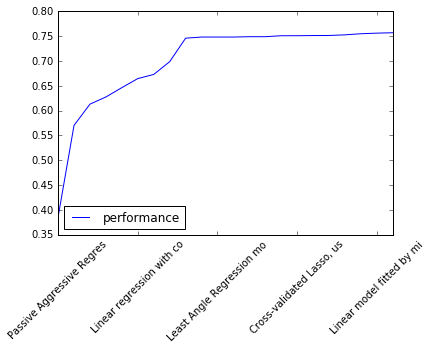

In [60]:
df = df.sort_values(col_name)
ax = df.plot(rot=45, x_compat=True)

### Augmentation du nombre de légend

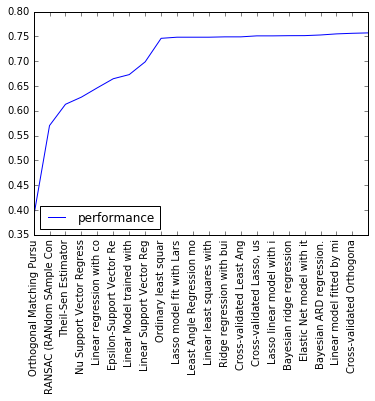

In [61]:
df = df.sort_values(col_name)
ax = df.plot(rot=90, x_compat=True)
ax.xaxis.set_ticklabels(df.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

### Rotation des infos sur x, et image plus large

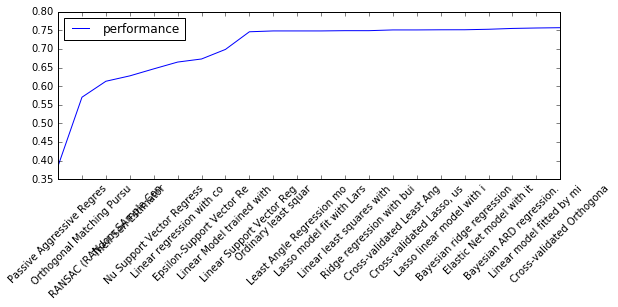

In [62]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(rot=45, ax=axes)


### affichage en barre

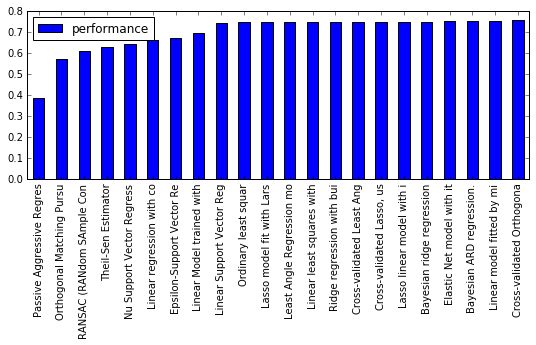

In [63]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(kind='bar', rot=90, ax=axes)

## on rajoute la perforamnce dans les labels

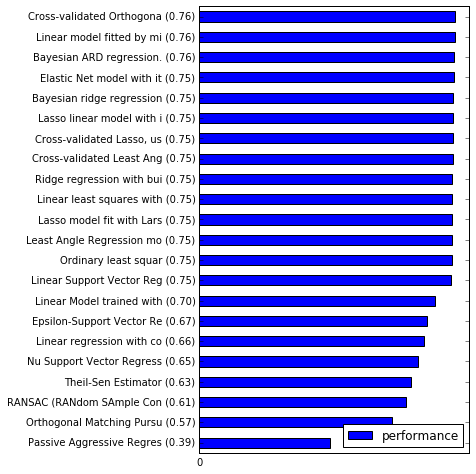

In [64]:
new_labels = []
for i, index in enumerate(df.index):
    new_label = "%s (%.2f)"%(index,df.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass

# 7) which scoring function ?

## on récupère les fonctions de score

In [65]:
def get_sklearn_score_functions(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions named as 'score'.
    
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ score_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print dir(sklearn)
    for nom_module in dir(sklearn):    
        if verbose : print nom_module
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if "score" in nom_fonction:
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print e
        if verbose: print "="*30
    return algos

In [66]:
scoring_modules = get_sklearn_score_functions(False)

In [67]:
scoring_modules.keys()

['grid_search', 'metrics', 'cross_validation']

## on s'intéresse aux métriques

In [68]:
scoring_modules["metrics"]

[<function sklearn.metrics.classification.accuracy_score>,
 <function sklearn.metrics.cluster.supervised.adjusted_mutual_info_score>,
 <function sklearn.metrics.cluster.supervised.adjusted_rand_score>,
 <function sklearn.metrics.ranking.average_precision_score>,
 <function sklearn.metrics.classification.brier_score_loss>,
 <function sklearn.metrics.classification.cohen_kappa_score>,
 <function sklearn.metrics.cluster.supervised.completeness_score>,
 <function sklearn.metrics.cluster.bicluster.consensus_score>,
 <function sklearn.metrics.regression.explained_variance_score>,
 <function sklearn.metrics.classification.f1_score>,
 <function sklearn.metrics.classification.fbeta_score>,
 <function sklearn.metrics.scorer.get_scorer>,
 <function sklearn.metrics.cluster.supervised.homogeneity_score>,
 <function sklearn.metrics.classification.jaccard_similarity_score>,
 <function sklearn.metrics.ranking.label_ranking_average_precision_score>,
 <function sklearn.metrics.scorer.make_scorer>,
 <fun

# 8) tester les métriques sur un algo

In [69]:
from sklearn.ensemble import BaggingRegressor

# 8.1) l'algo a des performances variables

In [70]:
performances = {}
for i in range(10):
    algorithme = BaggingRegressor()
    algorithme.fit(X_train, y_train)
    performance = algorithme.score(X_test, y_test)
    print i, performance
    performances[i] = [performance]

0 0.875152694243
1 0.886705676437
2 0.889211326493
3 0.869657209423
4 0.839075125445
5 0.885239421773
6 0.881646659982
7 0.877158219726
8 0.8689677812
9 0.883690176553


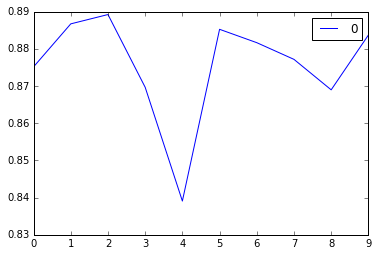

In [71]:
pd.DataFrame.from_dict(performances).T.plot()

## On peut calculer diverses métriques

In [72]:
y_pred = algorithme.predict(X_test)

In [75]:
score_par_metric = {}
for scoring_function in scoring_modules["metrics"]:
    try:
        info         = str(scoring_function)
        nom_metrique = info[info.find(" "):info.find(" at ")].strip()
        score_algo   = scoring_function(y_test, y_pred)
        score_par_metric[nom_metrique] =  [score_algo]
        print nom_metrique, " => ", score_algo
    except:
        pass

adjusted_mutual_info_score  =>  -0.00102189425976
adjusted_rand_score  =>  -0.000413061171917
completeness_score  =>  0.916946313301
explained_variance_score  =>  0.88384552252
homogeneity_score  =>  0.994695735047
mutual_info_score  =>  4.67009039306
normalized_mutual_info_score  =>  0.955030149842
r2_score  =>  0.883690176553
v_measure_score  =>  0.954239929903


## on les manipule dans une dataframe pandas

In [78]:
df_metriques = pd.DataFrame.from_dict(score_par_metric).T

In [79]:
colonne_de_score = "score"
df_metriques.columns = [colonne_de_score]
df_metriques.sort_values(colonne_de_score)

,score
adjusted_mutual_info_score,-0.001022
adjusted_rand_score,-0.000413
r2_score,0.883690
explained_variance_score,0.883846
completeness_score,0.916946
v_measure_score,0.954240
normalized_mutual_info_score,0.955030
homogeneity_score,0.994696
mutual_info_score,4.670090


## on peut les dessiner

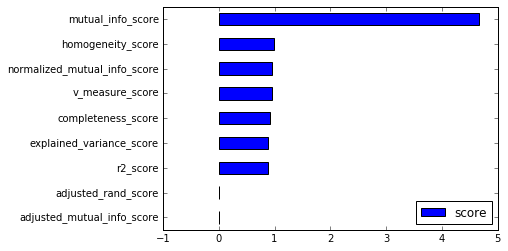

In [80]:
df_metriques.sort_values(by=colonne_de_score).plot(kind="barh")

# on s'intéresse en général au r2 et à la variance expliquée